The quantitative introduction workshops

# Workshop 3

If you have attended (physically or virtually) at least one of the first two workshops, and you haven't responded to the [halfway evaluation survey](https://docs.google.com/forms/d/1o0_lrqVGSpMt_0Wk3u0iCGnaQ2IFdKzjbN28COI8bf4/edit) yet, then please do it now - it would be a great help for me. The survey should take less than 5 minutes.

In this workshop you will learn

* Linear models with multiple predictors
* The concept of nested models
* Transformation of predictors
* The coefficient of determination: $R^2$

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AsgerAndersen/basecamp_stats_intro/master/origin_mobility.csv')

# Linear models: Multiple predictors

## Linear functions with multiple predictors

A linear function with outcome $y$ and $k$ predictors $x_1,x_2...,x_k$ has the form:

<p style="text-align: center;"> $y(x_1,x_2,...,x_k) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k$ </p>

The parameter $\beta_0$ is still called the intercept and is the value of $y$, when all the predictors are equal to 0. The parameters $\beta_1,\beta_2,...,\beta_k$ are called the slope parameters. The $i^{th}$ slope parameter $\beta_i$ is interpreted as the increase in the predicted outcome when the $i^{th}$ predictor $x_i$ is increased by 1 and all other predictors are held constant.

**Exercise 3.1:** Write up the linear function with outcome $y$, predictors $x_1,x_2$ and $x_3$ and parameters $(\beta_0,\beta_1,\beta_2,\beta_3)=(3,2,-1,0.5)$. Calculate the outcome values with the following values of the predictors:

* $(x_1,x_2,x_3)=(0,0,0)$
* $(x_1,x_2,x_3)=(5,3,8)$
* $(x_1,x_2,x_3)=(6,3,8)$
* $(x_1,x_2,x_3)=(7,3,4)$

**Answer 3.1:**

## Linear models with multiple predictors

A linear model with *mobility* as outcome and the predictors *german* and *south* has the functional form:

<p style="text-align: center;"> $m(g,s) = \beta_0 + \beta_1g + \beta_2s$ </p>

The fitted values, errors and $MSE$ can be calculated exactly the same way as with one predictor variable.

**Exercise 3.2:** Let the parameters be given as $(\beta_0,\beta_1,\beta_2)=(9,0.25,-5)$ in a linear model with *mobility* as outcome and *german* and *south* as predictors (where *south* is dummy coded with "False" as 0 and "True" as 1). Calculate the fitted values, errors and $MSE$ for the first three observations in the data (shown below). Execute the second and third cell below to see, if you were correct.

In [3]:
data.loc[0:2,['german','south','mobility']]

,german,south,mobility
0,13.41,True,6.22
1,9.91,True,5.37
2,8.36,True,7.26


**Answer 3.2:**

In [4]:
data['fitted_mobility'] = 9 + 0.25*data['german'] - 5*data['south']
data['error'] = data['mobility'] - data['fitted_mobility']
data.loc[0:2,['german','south','mobility','fitted_mobility','error']]

,german,south,mobility,fitted_mobility,error
0,13.41,True,6.22,7.35,-1.13
1,9.91,True,5.37,6.48,-1.11
2,8.36,True,7.26,6.09,1.17


In [5]:
print('MSE: {}'.format(np.round(data.loc[0:2,'error'].pow(2).mean(),2)))

MSE: 1.3


**Exercise 3.3:** The model with $(\beta_0,\beta_1,\beta_2)=(9,0.25,-5)$ has $MSE$:

In [6]:
data['error'].pow(2).mean()

38.97

whereas a model with $(\beta_0,\beta_1,\beta_2)=(6,0.5,-6)$ has $MSE:$

In [7]:
data['error_f2'] = data['mobility'] - (6 + 0.5*data['german'] - 6*data['south'])
data['error_f2'].pow(2).mean()

98.47

Which model is the best fit to the data according to the fitting criteria used in linear regression?

**Answer 3.3:** 

**Exercise 3.4:** The linear model found by linearly regressing $mobility$ on the predictors $german$ and $south$ has the parameters:

In [8]:
mob_ger_south = sm.ols('mobility~german+south',data).fit()
mob_ger_south.params

Intercept        6.80
south[T.True]   -1.02
german           0.15
dtype: float64

which we denote $(\beta_0,\beta_1,\beta_2)=(6.80,0.15,-1.02)$. Write up the resulting linear function. 

**Answer 3.4 (part 1):**

**Exercise 3.4 (continued):** What is the predicted *mobility* of a southern commuting zone with a german population share of 10 percent? What about a non-southern commuting zone with the same german population share? What is the predicted *mobility* of a southern commuting zone with a german population of 5 percent? What about a southern commuting zone with a german population share of 6 percent?

**Answer 3.4 (part 2):**

**Exercise 3.4 (continued):** What is the interpretation of each of the parameters $\beta_0,\beta_1$ and $\beta_2$?

**Answer 3.4 (part 3):**

**Exercise 3.4 (continued):** The model has an $MSE$ of:

In [9]:
mob_ger_south.resid.pow(2).mean()

21.23

What do we know about the $MSE$ of any other linear model with *mobility* as outcome and *german* and *south* as predictors?

**Answer 3.4 (part 4):**

# Nested models

One linear model A is said to be nested inside another linear model B, if the models have the same outcome variable, and the predictors in model A is a subset of the predictors in model B.

**Exercise 3.5:** Consider the following models:
* Model A: Linear model with *mobility* as outcome and *german* as predictor. $m(g) = \beta_0 + \beta_1 g$
* Model B: Linear model with *mobility* as outcome and *southern* as predictor. $m(s) = \beta_0 + \beta_1 s$
* Model C: Linear model with *mobility* as outcome and *german* as predictor. $m(s,g) = \beta_0 + \beta_1 g + \beta_2 s$

For each pair of models (A & B, A & C, B & C), decide whether one of the models is nested in the other model.

**Answer 3.5:**

**Exercise 3.6:** Another definition of nested models is that a linear model A is nested inside a linear model B, if model A can be obtained by setting some of the parameters in model B equal to 0. Why is this definition equivalent to the one I gave above?

**Answer 3.6:**

**Exercise 3.7:** Consider two models A and B, where A is nested inside of B. We use linear regression to fit both models on a given dataset, and we denote the $MSE$'s of the resulting models for $MSE_A$ and $MSE_B$. It is a mathematical fact that because A is nested inside of B, then $MSE_A$ is necessarily larger than $MSE_B$. Can you think of any arguments for why this is the case? Note that I am asking for informal arguments, not a strict mathematical proof. *Hint:* Because A is nested inside of $B$, we know that we can get model A by setting some of the parameters in model B equal to 0. Why does this imply that the minimal possible $MSE$ of model A must be larger than the minimal possible $MSE$ of model B?

**Answer 3.7:**

# Coefficient of determination: $R^2$

The model from the exercise above has $MSE=21.23$. The variance of the model's outcome variable, *mobility*, is $\sigma(m)=28.05$. The model therefore has a coefficient of determination - denoted by $R^2$ - of:

<p style="text-align: center;"> $R^2 = \frac{\sigma(m) - MSE}{\sigma(m)} = \frac{28.05 - 21.23}{28.05} = 0.24$  </p>

In general, the formula for the coefficient of determination of a linear model with a given $MSE$ and outcome variable $y$ is given as:

<p style="text-align: center;"> $R^2 = \frac{\sigma(y) - MSE}{\sigma(y)}$  </p>

The variance of a linear model's outcome variable is always larger than the model's $MSE$. You don't have to understand why, but the argument is actually not that complicated, so if you are interested you can try to look it up on the internet or ask me or one of the teaching assistants. Otherwise, just take it as a given. 

**Exercise 3.8:** Look at the formula for $R^2$ and use it - given what you know about $MSE$, the outcome's variance and linear regression - to explain the following properties of $R^2$: 
* $R^2$ is always between 0 and 1.
* If a linear model A has a smaller $MSE$ than another linear model B with the same outcome, then model A will have a larger $R^2$ than model B.
* Linear regression with a given outcome and some given predictors finds the linear model with the maximal $R^2$ out of all possible linear models with this outcome and these predictors. That is, finding the linear model that minimizes $MSE$ is the same as finding the linear model that maximizes $R^2$.
* If a linear model A is nested inside another linear model B, then model A will have a smaller $R^2$ than model B.

**Answer 3.8:**

**Exercise 3.9:** The last two bullet points in the exercise above imply that it does not matter if we think of linear regression as finding the linear model that minimizes $MSE$ or, alternatively, the linear model that maximizes $R^2$, since the two criterias result in the same model. The advantage of thinking in terms of minimizing $MSE$ is that $MSE$ is a simpler measure than $R^2$ in the sense that $R^2$ is defined via $MSE$. However, the advantage of thinking in terms of maximizing $R^2$ is that $R^2$ is a more interpretable measure. This is because a linear model's $R^2$ can be thought of as the percentage of the variance in the model's outcome variable that is explained by the model. Can you think of any arguments for why this is a reasonable interpretation? If not, then try to read [this page](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition) and see if you can follow the logic.

**Answer 3.9:**

# Transformation of predictors

We can use linear models to model non-linear relationships between the outcome and the predictors by making non-linear transformations on the predictors. Let's for instance say that we wanted to model how the *british* variable predicts the *mobility* variable. A linear regression with *mobility* as outcome and *british* as predictor results in the model seen in the plot below:

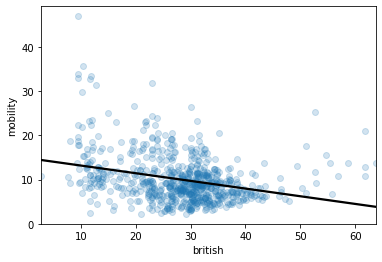

In [10]:
sb.regplot('british','mobility',data=data,ci=None,scatter_kws={'alpha':0.2},line_kws={'color':'black'});

However, we might think that the data looks like that a model with squared *british* variable would be a better fit. Thus, instead of using linear regression to fit this model: 

<p style="text-align: center;"> $m(b) = \beta_0 + \beta_1 b$  </p>

we can choose to use linear regression fit this alternative model:

<p style="text-align: center;"> $m(b) = \beta_0 +\beta_1 b +\beta_2 b^2$  </p>

which results in the model plotted below:

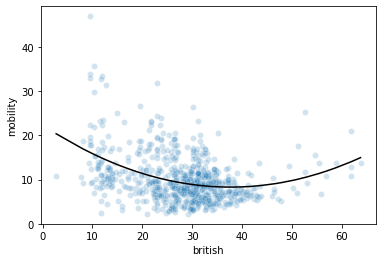

In [11]:
data['british_squared'] = data['british']**2
mob_brit2 = sm.ols('mobility~british+british_squared',data=data).fit()
mob_brit2_res = data[['british']].copy()
mob_brit2_res['mobility'] = mob_brit2.predict()
mob_brit2_res = mob_brit2_res.sort_values('british')
ax_squared = sb.scatterplot('british','mobility',data=data,alpha=0.2)
ax_squared.plot(mob_brit2_res['british'],mob_brit2_res['mobility'],color='black')

All we have to do to fit the model with the squared *british* term is to calculate a new variable in our dataset, which contains the squared values of the *british* variable:

In [12]:
data['british_squared'] = data['british']**2
data[['mobility','british','british_squared']].head()

,mobility,british,british_squared
0,6.22,43.81,1919.52
1,5.37,40.15,1611.72
2,7.26,41.81,1748.38
3,5.63,39.54,1563.68
4,4.48,37.26,1388.09


The *british_squared* variable is - from a statistical point of view - just another variable, and therefore we can include it in a linear regression model as just another predictor. Concretely, if we run linear regression with the model

<p style="text-align: center;"> $m(b) = \beta_0 +\beta_1 b +\beta_2 b^2$  </p>

we get the following fitted parameter values:

In [13]:
mob_brit2 = sm.ols('mobility~british+british_squared',data=data).fit()
mob_brit2.params.round(2)

Intercept          22.30
british            -0.74
british_squared     0.01
dtype: float64

which means that the resulting model has the functional form (this is the model that is plotted above):

<p style="text-align: center;"> $m(b) = 22.30 - 0.74 b + 0.01 b^2$  </p>

**Exercise 3.10:** What *mobility* value does this model predict for a commuting zone with a 10 percent british population share?

**Answer 3.10:**

As you see from this example, linear regression models are actually a quite flexible modelling framework, because they can model all kinds of non-linear relationships by making non-linear transformations on the predictors (e.g. squaring the *british* variable). Thus, a researcher using linear regression models needs to balance choosing a model that seems to fit the given data well with the simplicity of the model and its generalizability to similar, but unobserved datasets. Actually, this is not specific to linear regression models, but a general theme of doing quantitative modelling and you will learn much more about this in later courses. 

**Exercise 3.11:** Try to understand how a linear regression with transformed predictors (e.g. a squared term) is - statistically speaking - not substantially different from a linear model without transformed predictors. In particular, try to understand how the principle of finding the best fitting model by minimizing $MSE$ works the same way with and without transformed predictors. You can for instance start by understanding how the fitted values, errors and $MSE$ are calculated with transformed predictors (as said, it is the same as without, but it is still useful to work through some examples).

**Answer 3.11:**

# Extra

**Extra exercise:** Try to fit some linear regression models to [a dataset from the sklearn library](https://scikit-learn.org/stable/datasets/). You have to choose a numerical variable from the data as outcome and one or more numerical or categorical variable as predictors. You can even play around with transforming some of the predictors, if you think that would be interesting. Then make new code cells and try to make something similar to the code below (which you have seen earlier in this workshop) work on the new data.

In [14]:
mob_ger_south = sm.ols('mobility~german+south',data).fit()
mob_ger_south.params

Intercept        6.80
south[T.True]   -1.02
german           0.15
dtype: float64

How can you interpret the fitted parameters of the resulting model? Remember to also use the visualizations and statistical measures, you have learned about in the first lecture, to explore the distributions of and relationship between the variables, you choose to work with. You should do this, before you fit any linear regression model to the data.

In [15]:
#The code below shows how to load two datasets, one about housing prices in Boston and the other about wine.

#You can choose to work with one of these datasets or see if you find another dataset from the sklearn library more 
#interesting

#All the datasets from sklearn (including the housing prices and wine data) 
#are described on https://scikit-learn.org/stable/datasets/).

from sklearn.datasets import load_boston, load_wine
boston = load_boston()
prices = boston['target']
boston = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston['PRIC'] = prices
wine = load_wine()
wine_types = wine['target']
wine = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine['wine_type'] = wine_types

In [16]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRIC
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
